In [1]:
import matplotlib as plt
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

# para plotear con fondo oscuro
plt.style.use("dark_background")

<h4>Creamos un array con una imagen de internet</h4>

In [3]:
url = 'https://www.goodnet.org/photos/620x0/31501_hd.jpg'
internet_image = Image.open(urllib.request.urlopen(url))

In [4]:
#transformamos la imagen en un array
#preparamos 3 array por separadospara usarlos más adelante en diferentes casos
image1 = np.array(internet_image)
image2 = np.array(internet_image)
image3 = np.array(internet_image)

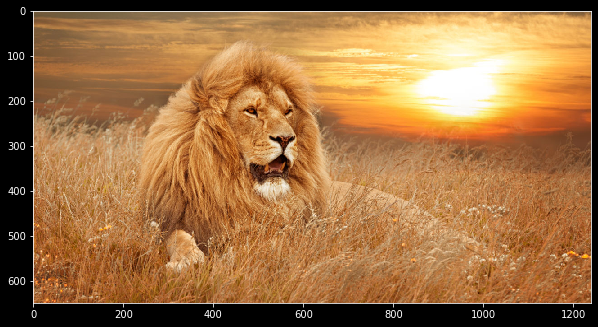

In [5]:
plt.figure(figsize=(10,20))
plt.imshow(image1)

In [6]:
print(image1.shape)

(649, 1240, 3)


In [10]:
#sacamos el total de pixeles de cada columna, fila y leyers
#sacamos todos los indices de filas, columnas y leyers
total_filas, total_columnas, total_layers = image1.shape
array_filas, array_columnas = np.ogrid[0:total_filas,0:total_columnas]
print(array_columnas)

[[   0    1    2 ... 1237 1238 1239]]


In [15]:
#sacar el indice central de las fila y la columna
fila_central, columna_central = int(total_filas / 2), int(total_columnas / 2)
print(fila_central, " y ", columna_central)

324  y  620


In [17]:
#calcular la distancia al centro y las ponemos en una matriz
dist_from_center = (array_filas - fila_central)**2 + (array_columnas - columna_central)**2

print("Matriz que contiene la distancias al centro")
print("_____________________________________________")
print(dist_from_center)
print("_____________________________________________")
print(np.amax(dist_from_center))


Matriz que contiene la distancias al centro
_____________________________________________
[[489376 488137 486900 ... 485665 486900 488137]
 [488729 487490 486253 ... 485018 486253 487490]
 [488084 486845 485608 ... 484373 485608 486845]
 ...
 [488084 486845 485608 ... 484373 485608 486845]
 [488729 487490 486253 ... 485018 486253 487490]
 [489376 488137 486900 ... 485665 486900 488137]]
_____________________________________________
489376


In [22]:
#calcular el tamaño del radio deseado
radius = (fila_central-50)**2
print("el radio es => ", radius)

el radio es =>  75076


In [23]:
#creamos una mascara circular
circular_mask = (dist_from_center > radius)
print(circular_mask.shape)
print(circular_mask[300:600,600:1000])
print(circular_mask)

(649, 1240)
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


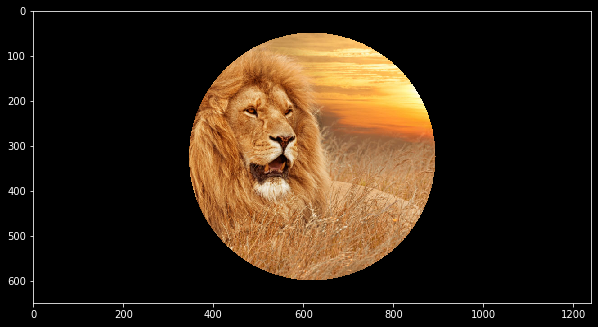

In [24]:
image1[circular_mask]=0
plt.figure(figsize=(10,20))
plt.imshow(image1)
